## Train/Test Split

A common problem is that powerful models can perfectly fit the data on which they are trained. These models are often <b>low bias</b> and <b>high variance</b> However, we can't observe the variance of a model directly, because we only know how it fits the data we have rather than all potential samples. The goal of supervised learning and the models which we will learn about is to build a model that generalizes. It should accurately predict the future rather than the past.

<b>Solution:</b> Use a procedure that <b>estimates</b> how well a model is likely to perform on out-of-sample data and use that to choose between models.


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset import
from sklearn.datasets import load_iris

# Decision tree based imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# For train test split and cross validation 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

### Load the Data
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Create X and y variable to stores the feature matrix and target from the Iris dataset. 

In [3]:
X = df[['sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)']].values

In [4]:
X.shape

(150, 4)

In [5]:
y = df['target'].values

In [6]:
y = y.reshape(-1,1)

In [7]:
y.shape

(150, 1)

### Train and Test on the Entire Data Set (Do Not Do This)
This is what we have been doing so far in this class for convenience, but it is a bad practice. 

1. Train the model on the **entire data set**.
2. Test the model on the **same data set** and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

#### Build Model and Make Predictions

In [8]:
# Import the model you want to use
# We already did this at top of page, but repeating in case you wonder where this code comes from
from sklearn.tree import DecisionTreeClassifier

# Make an instance of the model
clf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)

# Train the model on the data
clf.fit(X, y)

# class predictions 
predictions = clf.predict(X)

#### Measure Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple for now and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [9]:
# calculate classification accuracy
score = clf.score(X, y)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


#### Problems With Training and Testing on the Same Data

- Goal is to estimate likely performance of a model on **out-of-sample data**.
- Maximizing the training accuracy rewards **overly complex models** that won't necessarily generalize.
- Unnecessarily complex models **overfit** the training data.

![Overfitting](images/overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.

*Idea Credit: [@justmarkham](https://twitter.com/justmarkham)

### Train/Test Split (What we will mostly do in this class)

1. Split the data set into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set** and evaluate how well we did.

What does this accomplish?

- Models can be trained and tested on **different data** (We treat testing data like out-of-sample data).
- Response values are known for the testing set and thus **predictions can be evaluated**.

#### Undering train_test_split in python

In [10]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

##### Understanding the `random_state` Parameter

The `random_state` is a pseudo-random number that allows us to reproduce our results every time we run them. However, it makes it impossible to predict what are exact results will be if we chose a new `random_state`.

`random_state` is very useful for testing that your model was made correctly since it provides you with the same split each time. However, make sure you remove it if you are testing for model variability!

The code below makes roughly 80% (this could change for future version of scikit-learn) of the data into a training set and the remaining into a testing set.

![train_test_split](images/trainTestSplit.png)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size =.20)

In [12]:
# Original features matrix
X.shape

(150, 4)

In [13]:
# Original target vector
y.shape

(150, 1)

In [14]:
X_train.shape

(120, 4)

In [15]:
X_test.shape

(30, 4)

In [16]:
y_train.shape

(120, 1)

In [ ]:
y_test.shape

#### Build Model and Make Predictions

In [17]:
# Import the model you want to use
# We already did this at top of page, but repeating in case you wonder where this code comes from
from sklearn.tree import DecisionTreeClassifier

# Make an instance of the model
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)



# Train the model on the training data
clf.fit(X_train, y_train)

# class predictions for the test set
predictions = clf.predict(X_test)

#### Measure Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc), we are going to keep this simple for now and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

Accuracy is defined as:
(fraction of correct predictions): correct predictions / total number of data points

In [18]:
# calculate classification accuracy
score = clf.score(X_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.9666666666666667


<b>Advantages of Train/Test Split</b>: Fast, simple, computationally inexpensive.

<b>Disadvantages of Train/Test Split</b>: Eliminates data

### K-Folds Cross-Validation

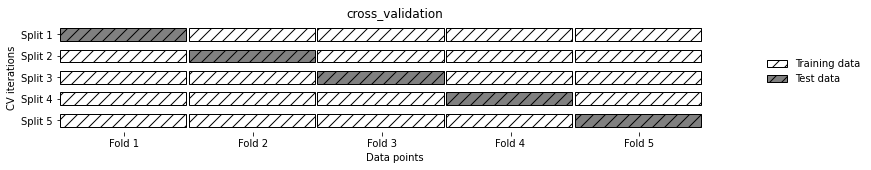

In [19]:
# Code for cell from Introduction to Machine Learning with Python 
# by Andreas Muller & Sarah Guido pg 258
# https://github.com/amueller/mglearn/blob/master/mglearn/plot_cross_validation.py

def plot_cross_validation():
    plt.figure(figsize=(12, 2))
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 5
    n_samples = 25

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[4]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)
    
    
plot_cross_validation()

The image above is 5 fold cross validation. 

Train/test split is useful, but it's a shame that we aren't using more data for training. 

**How can we use the maximum amount of our data points while still ensuring model integrity?**

1. Split the dataset into K equal partitions (or "folds")
    * So if k = 5 and dataset has 150 observations
    * Each of the 5 folds would have 30 observations
2. Use fold 1 as the testing set and rest is a training set
    * Testing set = 30 observations (fold 5)
    * Training set = 120 observations (fold 1-4)
3. Calculate testing accuracy
4. Repeat step 2 and step 3 K times, using a different fold as the testing set each time.
    * 2nd iteration
        * fold 4 would be the testing set
        * combination of fold 1, 2, 3, and 5 would be the training set
    * 3rd iteration
        * fold 3 would be the testing set
        * combination of fold 1, 2, 4, and 5 would be the training set
    * 4th iteration
        * fold 2 would be the testing set
        * combination of fold 1, 3, 4, and 5 would be the training set
    * 5th iteration
        * fold 1 would be the testing set
        * combination of fold 2, 3, 4, and 5 would be the training set
5. Average all test accuracies to get the estimated out-of-sample accuracy.

Although this may sound complicated, we are just training the model on k separate train-test-splits, then taking an average of the resulting test accuracies. This is more computationally intensive than train test split.

![](images/cross_validation_diagram.png)

There are many different variations of this procedure that we aren't covering in this class. 

#### Create a cross-valiation with five folds.

In [ ]:
help(KFold)

In [ ]:
# Making this process similar to the image in the previous section
kf = KFold(n_splits=5, shuffle=False)

In [ ]:
X

In [ ]:
accuracy_list = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    clf = DecisionTreeClassifier().fit(X[train_index], y[train_index])
    score = clf.score(X[test_index], y[test_index])

    accuracy_list.append(score)
    print('Model: ', n+1)
    print('Accuracy: ', accuracy_list[n])
    n = n + 1

In [ ]:
print('Mean of Accuracy for all folds:', np.mean(accuracy_list))

In [ ]:
clf = DecisionTreeClassifier()

# cross-validatation using a method (very similar to what we did in the code above)
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

Accuracy is different each time because the sampling is different each time. 

## Comparing cross-validation to train/test split
Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process